In [155]:
# todo readme.md


In [2]:
import time

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import layers, Sequential
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
# noinspection PyUnresolvedReferences
from tensorflow.math import confusion_matrix
from keras.utils.np_utils import to_categorical



from digit_recognition.config import split_train, split_test, \
    split_test_y_true, raw_test_path, predictions_csv
from digit_recognition.custom_funcs import transform_pred_data, \
    plot_confusion_matrix, plot_missclassified_images

In [157]:
df = pd.read_csv(split_train)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33596,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33597,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33598,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
print(f'Missing valus: {df.isnull().any().sum()}')

Missing valus: 0


In [159]:
label = 'label'
X = df.drop(label, axis=1)
y = df[label]

C:\Users\patoj\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

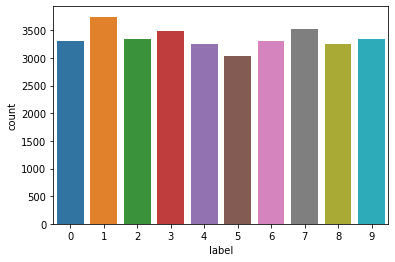

In [160]:
sns.countplot(y)

In [161]:

X  = X / 255
X = X.values.reshape(-1, 28, 28,1)

In [162]:
#  OneHot encoding y
print(y.shape)
classes = len(y.unique())
y = to_categorical(y, num_classes=classes)
print(y.shape)

(33600,)
(33600, 10)


Text(0.5, 1.0, 'This is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]')

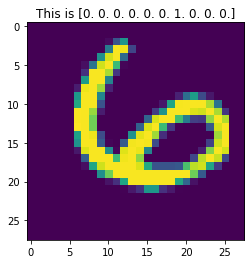

In [163]:
indx = 5
plt.imshow(X[indx])
plt.title(f'This is {y[indx]}')


In [164]:
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
)

In [165]:
NAME = f'LeNet {int(time.time())}'
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=f"logs/{NAME}")

print(NAME)



LeNet 1614115466


In [166]:
# Using LeNet 5 CNN architecture
model = Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu',
                        input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [167]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_16 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_25 (Dense)             (None, 84)               

In [168]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics='accuracy')

In [169]:
epochs = 10
batch_size = 32
model.fit(X_train, y_train,
          epochs=epochs,
          callbacks=[tensorboard_callback],
          validation_data=(X_val, y_val))

Epoch 1/10
840/840 [==============================] - 57s 53ms/step - loss: 0.6418 - accuracy: 0.8185 - val_loss: 0.1325 - val_accuracy: 0.9621

In [170]:
X_test = transform_pred_data(split_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

(8400, 28, 28, 1)


In [171]:
y_true = np.array(pd.read_csv(split_test_y_true))
y_true

array([[1],
       [8],
       [6],
       ...,
       [7],
       [7],
       [1]], dtype=int64)

(8400, 1)
(8400,)
(8400, 28, 28, 1)


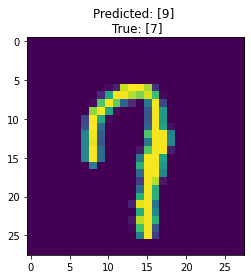

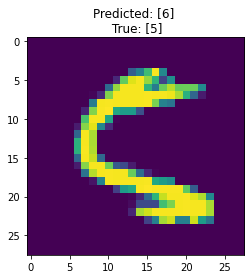

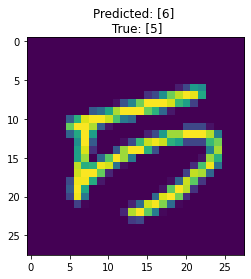

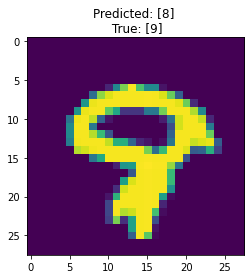

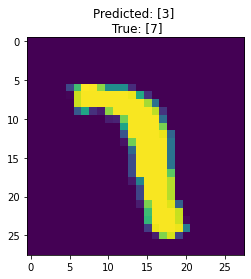

In [172]:
plot_missclassified_images(y_true, y_pred, X_test, n_images=5)

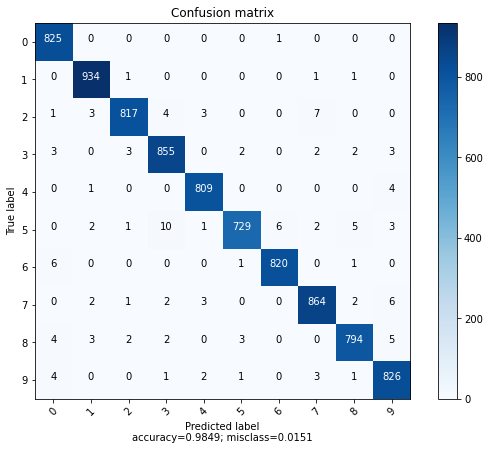

In [173]:
cm = confusion_matrix(y_true, y_pred)
cm = np.array(cm)

target_names = range(10)
plot_confusion_matrix(cm, target_names, normalize=False)


In [175]:
# model.save('final_model.h5')

In [3]:
final_model = load_model('final_model.h5')

In [4]:
test = transform_pred_data(raw_test_path)
predictions = final_model.predict(test)
predictions

(28000, 28, 28, 1)


array([[9.1130445e-12, 6.8250204e-11, 1.0000000e+00, ..., 1.2674292e-10,
        7.3783037e-13, 2.3761622e-14],
       [9.9999940e-01, 6.8216842e-11, 7.3089250e-09, ..., 7.4788169e-08,
        3.3341328e-13, 1.3181874e-08],
       [6.4841970e-08, 2.9474998e-07, 1.5149382e-07, ..., 1.3284017e-05,
        4.8367240e-04, 9.9883014e-01],
       ...,
       [1.2862619e-21, 1.6529858e-10, 4.8930589e-16, ..., 5.6067190e-13,
        7.1107824e-12, 5.2647203e-11],
       [2.3026204e-11, 4.1402290e-09, 6.1550959e-11, ..., 4.2718662e-07,
        3.4359488e-08, 9.9968946e-01],
       [9.6337882e-10, 3.1512630e-09, 9.9999988e-01, ..., 5.3091120e-10,
        1.7924194e-08, 2.2346869e-09]], dtype=float32)

In [5]:
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [7]:
predictions_df = pd.DataFrame({'ImageId' : range(1, len(predictions) + 1),
                               'Label' : predictions})
predictions_df.to_csv(predictions_csv, index=False)